In [1]:
#### Importing libraries.

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pandas.plotting import register_matplotlib_converters #Register pandas formatters and converters with matplotlib.
from pylab import rcParams # for customizing matplotlib graphs.
sns.set_style("whitegrid") # This one is very important to keep overall plot background as white

In [2]:
## Reading CSV file from dataset
data = pd.read_csv(r'C:\Users\rnr31\Documents\GitHub\apple_watch_tracker\dataset_5sec.csv')
data.head()

,Unnamed: 0,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,0,16170,78.0,NaN,100.0,9.811476,9.758895,9.849411,0.014626,0.029340,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,U12
1,1,15871,145.0,NaN,100.0,9.939207,7.707437,17.146631,1.775944,0.999925,...,89.200210,89.065143,89.335277,0.191013,16.539349,16.539349,16.539349,0.628595,Car,U12
2,2,16811,150.0,NaN,100.0,9.827178,9.804817,9.849262,0.011199,0.665215,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,U12
3,3,15831,105.0,NaN,77.0,9.673039,7.659674,12.304298,0.862553,0.996221,...,87.470377,87.470377,87.470377,2.284186,17.739895,17.739895,17.739895,0.628595,Car,U12
4,4,876,77.0,NaN,100.0,9.993466,8.965621,10.891645,0.504117,0.563792,...,89.770732,89.770732,89.770732,0.006389,9.000000,9.000000,9.000000,NaN,Car,U1


In [4]:
from sklearn.preprocessing import OrdinalEncoder
from numpy import asarray
oe = OrdinalEncoder()
ct = asarray(data['user'])
data['user'] = oe.fit_transform(ct.reshape(-1,1))
data.head()

,Unnamed: 0,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,0,16170,78.0,NaN,100.0,9.811476,9.758895,9.849411,0.014626,0.029340,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,3.0
1,1,15871,145.0,NaN,100.0,9.939207,7.707437,17.146631,1.775944,0.999925,...,89.200210,89.065143,89.335277,0.191013,16.539349,16.539349,16.539349,0.628595,Car,3.0
2,2,16811,150.0,NaN,100.0,9.827178,9.804817,9.849262,0.011199,0.665215,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,3.0
3,3,15831,105.0,NaN,77.0,9.673039,7.659674,12.304298,0.862553,0.996221,...,87.470377,87.470377,87.470377,2.284186,17.739895,17.739895,17.739895,0.628595,Car,3.0
4,4,876,77.0,NaN,100.0,9.993466,8.965621,10.891645,0.504117,0.563792,...,89.770732,89.770732,89.770732,0.006389,9.000000,9.000000,9.000000,NaN,Car,0.0


In [7]:
data = data.sort_values(by='user')
data.head()

,Unnamed: 0,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
2946,2946,5228,190.0,NaN,92.0,10.179832,10.137434,10.207683,0.020380,0.995086,...,84.350732,84.350732,84.350732,0.923820,NaN,NaN,NaN,NaN,Train,0.0
3075,3075,5835,193.0,NaN,35.0,10.179362,9.853068,10.587065,0.167584,0.987558,...,89.762268,89.762268,89.762268,0.001198,NaN,NaN,NaN,NaN,Train,0.0
3076,3076,2274,256.0,NaN,8.0,9.657759,9.029124,10.286443,0.414025,0.844973,...,89.769040,89.769040,89.769040,0.013131,30.75,30.75,30.75,NaN,Car,0.0
3077,3077,7287,86.0,NaN,100.0,10.299321,8.088142,12.456252,1.604990,0.968824,...,88.572737,88.572737,88.572737,0.095157,0.75,0.75,0.75,NaN,Walking,0.0
3079,3079,184,91.0,NaN,85.0,9.729062,7.139446,14.355289,2.184604,0.928255,...,89.773691,89.767912,89.779470,0.008173,11.00,11.00,11.00,NaN,Bus,0.0


In [11]:
data.to_csv('sort_dataset_5sec.csv', index=False)

C:\Users\rnr31\anaconda3\envs\ds22\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='user', ylabel='count'>

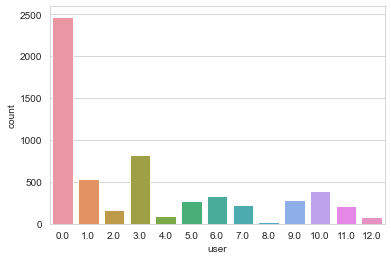

In [12]:
sns.countplot(data['user'])

C:\Users\rnr31\anaconda3\envs\ds22\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

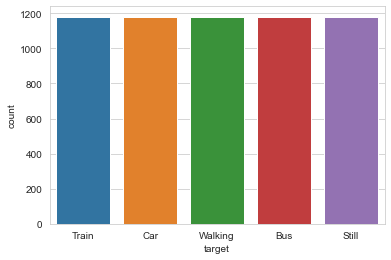

In [13]:
sns.countplot(data['target'])

In [9]:
data.reset_index(drop=True, inplace = True)
data.head()

,Unnamed: 0,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,2946,5228,190.0,NaN,92.0,10.179832,10.137434,10.207683,0.020380,0.995086,...,84.350732,84.350732,84.350732,0.923820,NaN,NaN,NaN,NaN,Train,0.0
1,3075,5835,193.0,NaN,35.0,10.179362,9.853068,10.587065,0.167584,0.987558,...,89.762268,89.762268,89.762268,0.001198,NaN,NaN,NaN,NaN,Train,0.0
2,3076,2274,256.0,NaN,8.0,9.657759,9.029124,10.286443,0.414025,0.844973,...,89.769040,89.769040,89.769040,0.013131,30.75,30.75,30.75,NaN,Car,0.0
3,3077,7287,86.0,NaN,100.0,10.299321,8.088142,12.456252,1.604990,0.968824,...,88.572737,88.572737,88.572737,0.095157,0.75,0.75,0.75,NaN,Walking,0.0
4,3079,184,91.0,NaN,85.0,9.729062,7.139446,14.355289,2.184604,0.928255,...,89.773691,89.767912,89.779470,0.008173,11.00,11.00,11.00,NaN,Bus,0.0


In [8]:
data.user.unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [ ]:
missing_num = data.isnull().sum()

In [ ]:
data['target'].unquie()

In [ ]:
len(data)
missing_percent = missing_num/len(data)
final_missing = missing_percent.round(4)*100
final_missing.to_csv('missing_percent.csv')

In [ ]:
df1 = data.groupby(['target'], as_index=False)['activityrecognition#1'].mean()
sns.barplot(x=df1['target'], y=df1['activityrecognition#1'], hue='target', data= df1)

In [ ]:
df1 = data.groupby(['target'], as_index=False)['activityrecognition#1'].median()
sns.barplot(x=df1['target'], y=df1['activityrecognition#1'], hue='target', data= df1)

In [ ]:
df1 = data.groupby(['target'], as_index=False)['activityrecognition#1'].min()
sns.barplot(x=df1['target'], y=df1['activityrecognition#1'], hue='target', data= df1)

In [ ]:
df1 = data.groupby(['target'], as_index=False)['activityrecognition#1'].max()
sns.barplot(x=df1['target'], y=df1['activityrecognition#1'], hue='target', data= df1)

In [ ]:
df1 = data.groupby(['target'], as_index=False)['activityrecognition#1'].std()
sns.barplot(x=df1['target'], y=df1['activityrecognition#1'], hue='target', data= df1)

In [ ]:
data['testing']= data['android.sensor.accelerometer#max']-data['android.sensor.accelerometer#min']
data['testing']==data['android.sensor.accelerometer#std']